In [2]:
import torch
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from iirnet.designer import Designer

In [114]:
def plot_response(sos, m):
    # measure and plot the response
    w, h = scipy.signal.sosfreqz(sos.numpy(), fs=2)

    # interpolate the target for plotting
    m_int = torch.tensor(m).view(1, 1, -1).float()
    m_int = torch.nn.functional.interpolate(m_int, 512, mode=mode)
    
    zeros, poles, k = scipy.signal.sos2zpk(sos.squeeze())
    
    mag_idx = 0
    plot_idx = 1
    
    fix, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
    axs[mag_idx].plot(w, 20 * np.log10(np.abs(h)), color="tab:blue", label="target")
    axs[mag_idx].plot(w, m_int.squeeze().numpy(), color="tab:red", label="pred")
    #axs[mag_idx].set_xscale("log")
    # axs[mag_idx].set_ylim([-60, 40])
    axs[mag_idx].grid()
    axs[mag_idx].spines["top"].set_visible(False)
    axs[mag_idx].spines["right"].set_visible(False)
    axs[mag_idx].spines["bottom"].set_visible(False)
    axs[mag_idx].spines["left"].set_visible(False)
    axs[mag_idx].set_ylabel("Amplitude (dB)")
    axs[mag_idx].set_xlabel("Frequency (Hz)")

    # pole-zero plot
    for pole in poles:
        axs[plot_idx].scatter(
            np.real(pole),
            np.imag(pole),
            c="tab:red",
            s=10,
            marker="x",
            facecolors="none",
        )
    for zero in zeros:
        axs[plot_idx].scatter(
            np.real(zero),
            np.imag(zero),
            s=10,
            marker="o",
            facecolors="none",
            edgecolors="tab:red",
        )

    # unit circle
    unit_circle = circle1 = plt.Circle((0, 0), 1, color="k", fill=False)
    axs[plot_idx].add_patch(unit_circle)
    axs[plot_idx].set_ylim([-1.5, 1.5])
    axs[plot_idx].set_xlim([-1.5, 1.5])
    axs[plot_idx].grid()
    axs[plot_idx].spines["top"].set_visible(False)
    axs[plot_idx].spines["right"].set_visible(False)
    axs[plot_idx].spines["bottom"].set_visible(False)
    axs[plot_idx].spines["left"].set_visible(False)
    axs[plot_idx].set_aspect("equal")
    axs[plot_idx].set_axisbelow(True)
    axs[plot_idx].set_ylabel("Im")
    axs[plot_idx].set_xlabel("Re")

    plt.grid(c="lightgray")
    axs[0].legend()
    plt.tight_layout()

In [ ]:
# first load IIRNet with pre-trained weights
designer = Designer()

/Users/cjstein/Code/test/IIRNet/env/lib/python3.9/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=linear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


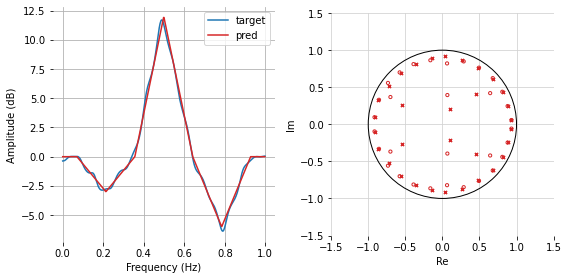

In [115]:
n = 32  # Desired filter order (4, 8, 16, 32, 64)
m = [0, -3, 0, 12, 0, -6, 0]  # Magnitude response specification
mode = "linear"  # interpolation mode for specification
output = "sos"  # Output type ("sos", or "ba")

# now call the designer with parameters
sos = designer(n, m, mode=mode, output=output)

plot_response(sos, m)

/Users/cjstein/Code/test/IIRNet/env/lib/python3.9/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=linear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


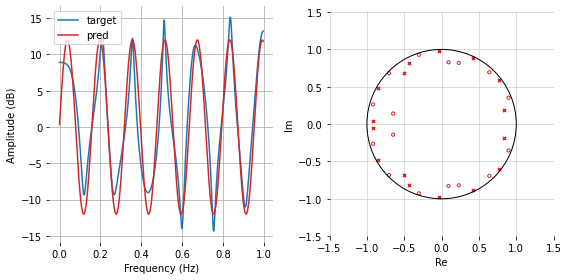

In [120]:
n = 16  # Desired filter order (4, 8, 16, 32, 64)
m = 12 * np.sin(2 * np.pi * np.linspace(0,2*np.pi, num=512*4))  # Magnitude response specification
mode = "linear"  # interpolation mode for specification
output = "sos"  # Output type ("sos", or "ba")

# now call the designer with parameters
sos = designer(n, m, mode=mode, output=output)

plot_response(sos, m)

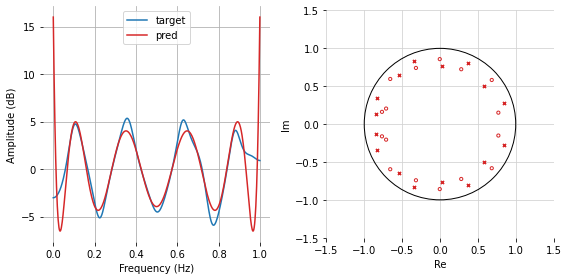

In [117]:
n = 16  # Desired filter order (4, 8, 16, 32, 64)
x = np.linspace(-1,1,num=512)
m = 16 * (1/256) * (46189*x**10 - 109395 * x**8 + + 90090 * x**6 - 30030 * x**4 + 3465 * x **2 - 63)
mode = "nearest"  # interpolation mode for specification
output = "sos"  # Output type ("sos", or "ba")

# now call the designer with parameters
sos = designer(n, m, mode=mode, output=output)

plot_response(sos, m)

/Users/cjstein/Code/test/IIRNet/env/lib/python3.9/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=linear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


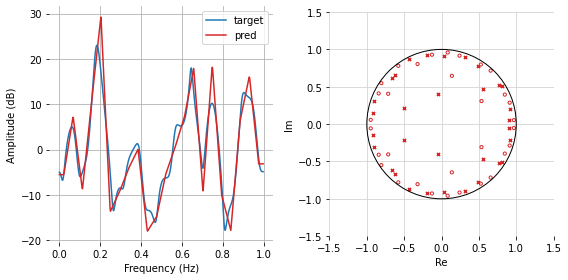

In [121]:
n = 32  # Desired filter order (4, 8, 16, 32, 64)
x = np.linspace(-1,1,num=512)
m = 12 * np.random.randn(22)
mode = "linear"  # interpolation mode for specification
output = "sos"  # Output type ("sos", or "ba")

# now call the designer with parameters
sos = designer(n, m, mode=mode, output=output)

plot_response(sos, m)